<a href="https://colab.research.google.com/github/syoungahh/class2023Fall/blob/main/audio_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio Processing
---

https://musiclab.chromeexperiments.com/Spectrogram/

### Fourier transform (분석용)
* spectrum은 주어진 signal에 대해 어떤 주파수 성분이 많이 있나?
* spectrogram은 spectrum을 time 축으로 concatenate한 것
* 방법: signal (inner product) a series of complex phasors with different frequencies
* inner product는 일종의 correlation (즉, 해당 frequency가 얼마나 있는지 probing)
* 왜? sine phasor 안 쓰나? phase sensitivity 때문

### Auto correlation
* measuring pitch / F0

### RMS: root mean square
* measuring intensity

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display #forier transer 음향관련된게 든 library

### load / plot / play sound file

In [3]:
# from google.colab import files
# fn = files.upload()
import os
url = "https://raw.githubusercontent.com/hsnam95/class2023Fall/main/aeiou.wav"
os.system("curl " + url + " > aeiou.wav")    #콜렙에 aeiou.wav가 저장

s, sr = librosa.load('aeiou.wav')  #출력은 signal값. 백터숫자만 쭈르륵. 거기 해당되는 sr값 하나가 ㄴ= s에저자ㅏㅇ됨

In [5]:
 s   #48600개

array([0.00335323, 0.00516238, 0.00495242, ..., 0.00537182, 0.00525953,
       0.00537523], dtype=float32)

In [6]:
sr   #그럼 몇초짜리 모이2인가? 48600 / 22050 =2초 좀 넘음

22050

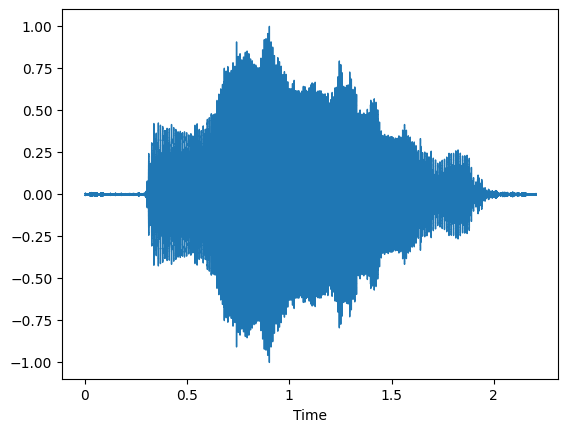

In [10]:
s = librosa.util.normalize(s)  #이상적인 진폭이 -1~1이라 노멀라이즈)
librosa.display.waveshow(s, sr=sr)   #plot
ipd.Audio(s[7000:12000], rate=sr)   #최소값이 -0.4, 최대가 0.4 따라서 진폭amp가 0.4정도 . []는 간격

### **Fourier Transform** for Spectrogram 아에이오우를 스팩트럼으로 만드는 코드

(0.0, 5000.0)

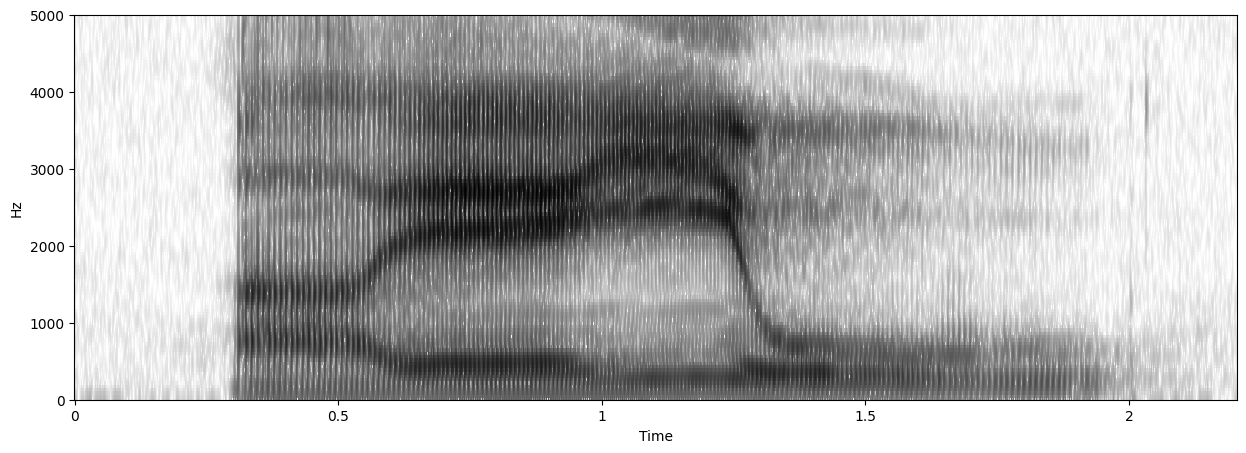

In [12]:
s_preemp = librosa.effects.preemphasis(s)  #일부만 정해서 요기만 딱 분석!. 여러 주파수 (저~고)의 complex phasor와 inner product를

n_fft=512    #만큼의 숫자가 있다. 클수록 촘촘
hop_length=int(0.001*sr)   #얼만큼 그다음껄 뛸건지. 1milisc
win_length=int(sr*0.008)  #window length = 0.008초만큼의 샘플만 해라 = 8msec = 8/1000

spec = librosa.stft(s_preemp, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window = 'hann')  #!!!stft!!!  spec안에 complex가 쭉~inner product 복소수complex값이 나와서
magspec = np.abs(spec)   # np.abs = 절댓값을 친다!!!! (원점으로부터의 길이=실수=mag)
dBspec = librosa.amplitude_to_db(magspec, ref=np.max)

plt.figure(figsize=(15, 5))
librosa.display.specshow(dBspec, sr=sr, x_coords = np.linspace(1, len(s), dBspec.shape[1])/sr , x_axis='time', y_axis='linear', cmap='Greys')
plt.ylim((0,5000))   #5000hz까지함.

#10hz~ 5000까지 갓다면 숫자는 500개 (5000나누기 10)

### Filter for audio transformation

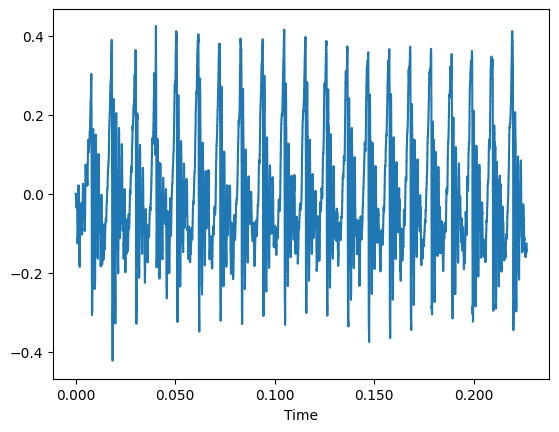

In [15]:
from scipy.signal import lfilter
sig = s[7000:12000]
sig = lfilter(np.array([1]), np.array([1]), sig, axis=0)
librosa.display.waveshow(sig, sr=sr)
ipd.Audio(sig, rate=sr)

### RMS(Root Mean Square) for intensity 진폭보려고 음수없애기

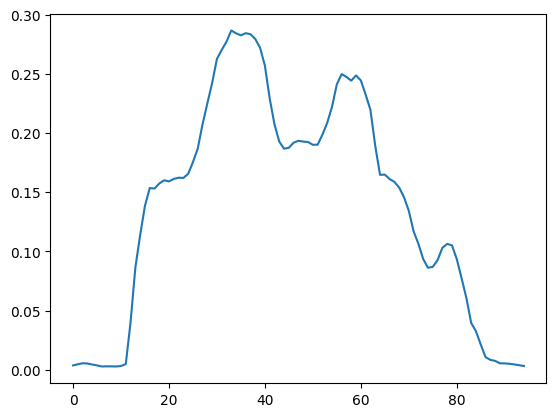

In [16]:
rms = librosa.feature.rms(y=s)
plt.plot(rms[0])

### Autocorrelation for pitch(F0)음의 높낮이!! measurement(방법은 auto(자기자신과)correlation). 1초에목이145(hz)번왓다갓다..

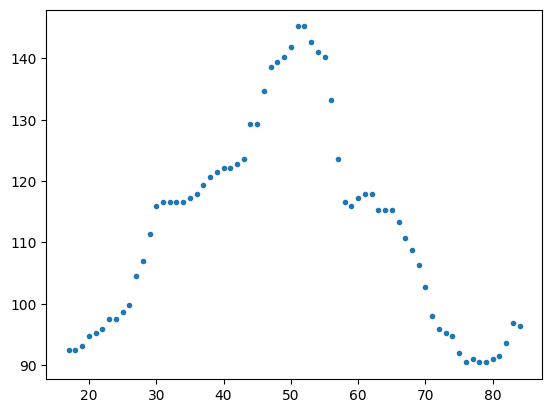

In [18]:
F0, voiced_flag, voiced_prob = librosa.pyin(s, fmin=60, fmax=200)
plt.plot(F0, '.')